### This was created by Julia Drygalska

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [14]:
df = pd.read_csv('datasets/price_paid_records_cleaned.csv')
print("CSV loaded successfully!")


CSV loaded successfully!


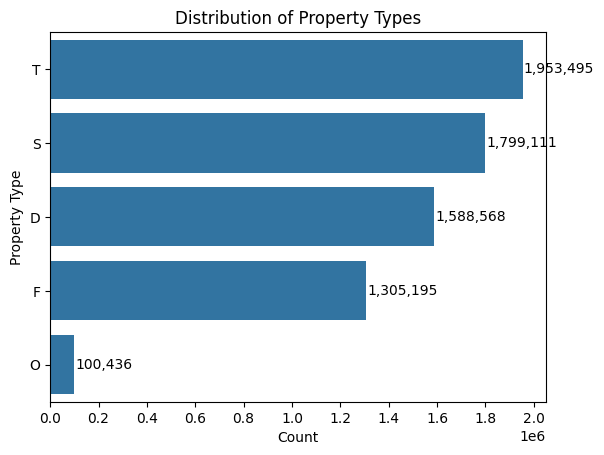

In [15]:
# Histogram for property types
if 'property_type' in df.columns:
    sns.countplot(y='property_type', data=df, order=df['property_type'].value_counts().index)
    plt.title('Distribution of Property Types')
    plt.xlabel('Count')
    plt.ylabel('Property Type')
    for i, count in enumerate(df['property_type'].value_counts()):
        plt.text(count + 5000, i, f'{count:,}', va='center')  # Adding real count numbers next to bars
    plt.xticks(range(0, 2000001, 200000))
    plt.show()



### Conclusion
##### T- Terraced properties, are shown to be most common
##### S- Semi-detached, are just behind showing that they are also popular
##### D- Detached, are popular but not as popular as other types
##### F- Flats, not as popular, but it still has significant numbers
##### O- Other properites are not very popular, since they might be properties like residential type, which not a lot of people can afford. 

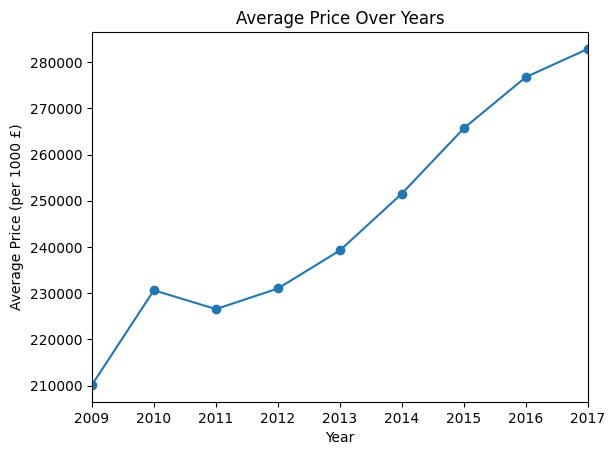

In [12]:
# Line plot for price over time
if 'date_of_transfer' in df.columns:
    df['date_of_transfer'] = pd.to_datetime(df['date_of_transfer'], errors='coerce')
    df = df.dropna(subset=['date_of_transfer'])
    df_price_over_time = df.groupby(df['date_of_transfer'].dt.to_period('Y')).mean(numeric_only=True)['price']
    if not df_price_over_time.empty:
        df_price_over_time.plot(kind='line', marker='o')
        plt.title('Average Price Over Years')
        plt.xlabel('Year')
        plt.ylabel('Average Price (per 1000 £)')
        plt.show()
    else:
        print("No valid data available for line plot of price over time.")


### Conclusion
##### This chart shows the trend of average prices of properties from 2009 till 2017. The prices consistely increse, which indicates a rising real estate market.